# Logistic Regression: one-vs-all

Code for plotting the decision boundaries was taken from [this Stack Overflow answer](https://stackoverflow.com/a/28257799)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

sns.set(style='white')
%matplotlib inline

In [36]:
data = make_blobs(n_samples=150, centers=3)

In [37]:
X = data[0]
Y = data[1]

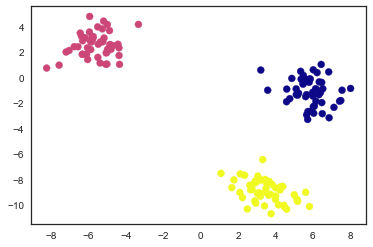

In [38]:
plt.scatter(X.T[0], X.T[1], c=Y, cmap='plasma');

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
y1 = [0 if x == 0 else 1 for x in Y]
y2 = [0 if x == 1 else 1 for x in Y]
y3 = [0 if x == 2 else 1 for x in Y]

In [41]:
model1 = LogisticRegression().fit(X, y1)
model2 = LogisticRegression().fit(X, y2)
model3 = LogisticRegression().fit(X, y3)

In [42]:
xx, yy = np.mgrid[-10:10:.01, -10:6:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

In [43]:
probs1 = model1.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2 = model2.predict_proba(grid)[:, 1].reshape(xx.shape)
probs3 = model3.predict_proba(grid)[:, 1].reshape(xx.shape)

## First model decision boundary

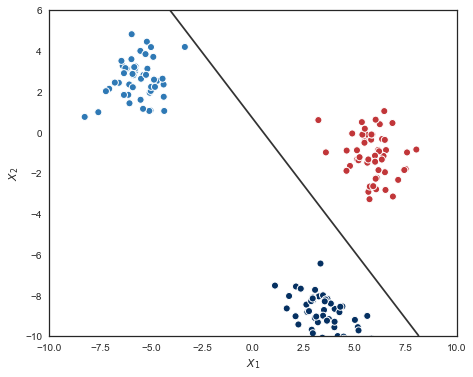

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs1, levels=[.5], cmap="Greys", vmin=0, vmax=.6);

ax.scatter(X.T[0], X.T[1], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1);

ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-10, 6),
       xlabel="$X_1$", ylabel="$X_2$");

## Second model decision boundary

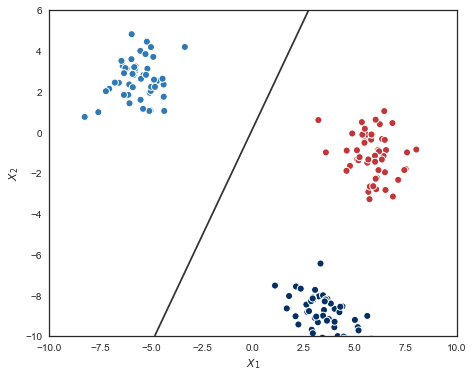

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs2, levels=[.5], cmap="Greys", vmin=0, vmax=.6);

ax.scatter(X.T[0], X.T[1], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1);

ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-10, 6),
       xlabel="$X_1$", ylabel="$X_2$");

## Third model decision boundary

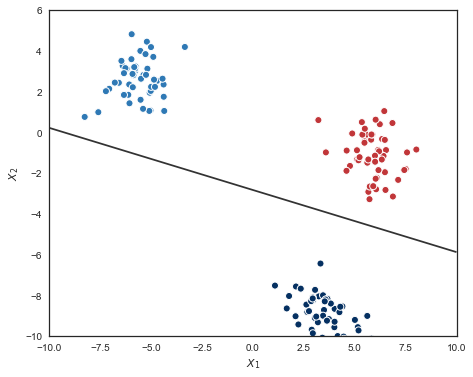

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs3, levels=[.5], cmap="Greys", vmin=0, vmax=.6);

ax.scatter(X.T[0], X.T[1], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1);

ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-10, 6),
       xlabel="$X_1$", ylabel="$X_2$");

In [53]:
# Predict for the test example, x1 = 0, x2 = -5
# Prints 0: we defined model3 to output 0 if the class is 2.
print(model3.predict([[0, -5]]))

# Shows the actual probabilities for each class. Remember this
# is a one-vs-rest implementation, so class 0 here is class 2
# and class 1 here is "not class 2"
print(model3.predict_proba([[0, -5]]))

# Prints the same output as the first
print(np.argmax(model3.predict_proba([[0, -5]])))

[0]
[[0.91352989 0.08647011]]
0


## Using the built-in one-vs-rest facility

Code taken from [documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html)

In [80]:
model4 = LogisticRegression(multi_class='ovr').fit(X, Y)

In [81]:
probs4 = model4.predict(grid).reshape(xx.shape)

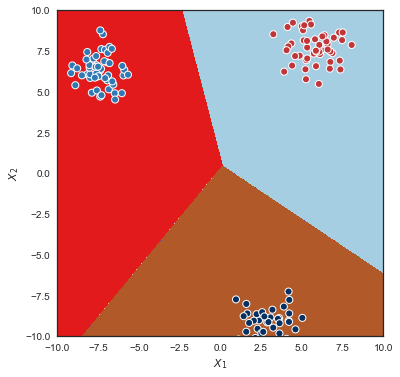

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xx, yy, probs4, cmap=plt.cm.Paired);

ax.scatter(X.T[0], X.T[1], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1);

ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-10, 10),
       xlabel="$X_1$", ylabel="$X_2$");